In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
from shapely.geometry import Point
import bar_chart_race as bcr

In [2]:
df = pd.read_csv("dataset.csv")
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

# FIXING COLUMNS NAMES

In [4]:
col_names = [ col.lower().replace(' ', '_') for col in df.columns ]

col_names

['vin_(1-10)',
 'county',
 'city',
 'state',
 'postal_code',
 'model_year',
 'make',
 'model',
 'electric_vehicle_type',
 'clean_alternative_fuel_vehicle_(cafv)_eligibility',
 'electric_range',
 'base_msrp',
 'legislative_district',
 'dol_vehicle_id',
 'vehicle_location',
 'electric_utility',
 '2020_census_tract']

In [5]:
df.columns = col_names

In [6]:
df.head()

,vin_(1-10),county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_(cafv)_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,2020_census_tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [7]:
df['state'].unique()

array(['FL', 'NV', 'WA', 'IL', 'NY', 'VA', 'OK', 'KS', 'CA', 'NE', 'MD',
       'CO', 'DC', 'TN', 'SC', 'CT', 'OR', 'TX', 'SD', 'HI', 'GA', 'MS',
       'AR', 'NC', 'MO', 'UT', 'PA', 'DE', 'OH', 'WY', 'AL', 'ID', 'AZ',
       'AK', 'LA', 'NM', 'WI', 'KY', 'NJ', 'MN', 'MA', 'ME', 'RI', 'NH',
       'ND'], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   vin_(1-10)                                         112634 non-null  object 
 1   county                                             112634 non-null  object 
 2   city                                               112634 non-null  object 
 3   state                                              112634 non-null  object 
 4   postal_code                                        112634 non-null  int64  
 5   model_year                                         112634 non-null  int64  
 6   make                                               112634 non-null  object 
 7   model                                              112614 non-null  object 
 8   electric_vehicle_type                              112634 non-null  object

In [8]:
df.isnull().sum().sort_values(ascending=False)

electric_utility                                     443
legislative_district                                 286
vehicle_location                                      24
model                                                 20
vin_(1-10)                                             0
postal_code                                            0
county                                                 0
state                                                  0
city                                                   0
electric_vehicle_type                                  0
make                                                   0
model_year                                             0
clean_alternative_fuel_vehicle_(cafv)_eligibility      0
base_msrp                                              0
electric_range                                         0
dol_vehicle_id                                         0
2020_census_tract                                      0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112152 entries, 2 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   vin_(1-10)                                         112152 non-null  object 
 1   county                                             112152 non-null  object 
 2   city                                               112152 non-null  object 
 3   state                                              112152 non-null  object 
 4   postal_code                                        112152 non-null  int64  
 5   model_year                                         112152 non-null  int64  
 6   make                                               112152 non-null  object 
 7   model                                              112152 non-null  object 
 8   electric_vehicle_type                              112152 non-null  object 
 9 

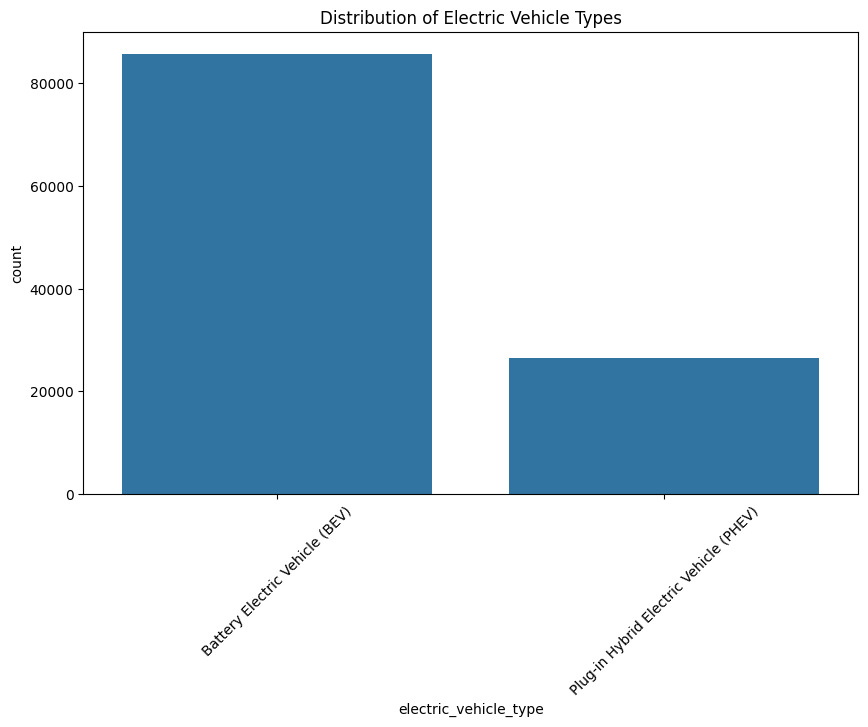

In [11]:
# Univariate Analysis: Distribution of Electric Vehicle Types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='electric_vehicle_type')
plt.title('Distribution of Electric Vehicle Types')
plt.xticks(rotation=45)
plt.show()

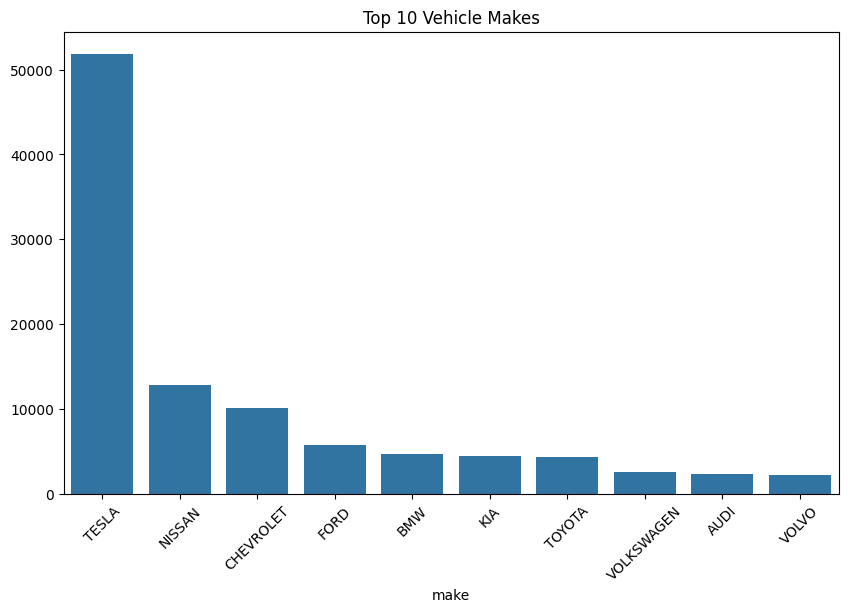

In [12]:
# Univariate Analysis: Distribution of Vehicle Makes
plt.figure(figsize=(10, 6))
top_makes = df['make'].value_counts().nlargest(10)  # Show top 10 makes
sns.barplot(x=top_makes.index, y=top_makes.values)
plt.title('Top 10 Vehicle Makes')
plt.xticks(rotation=45)
plt.show()

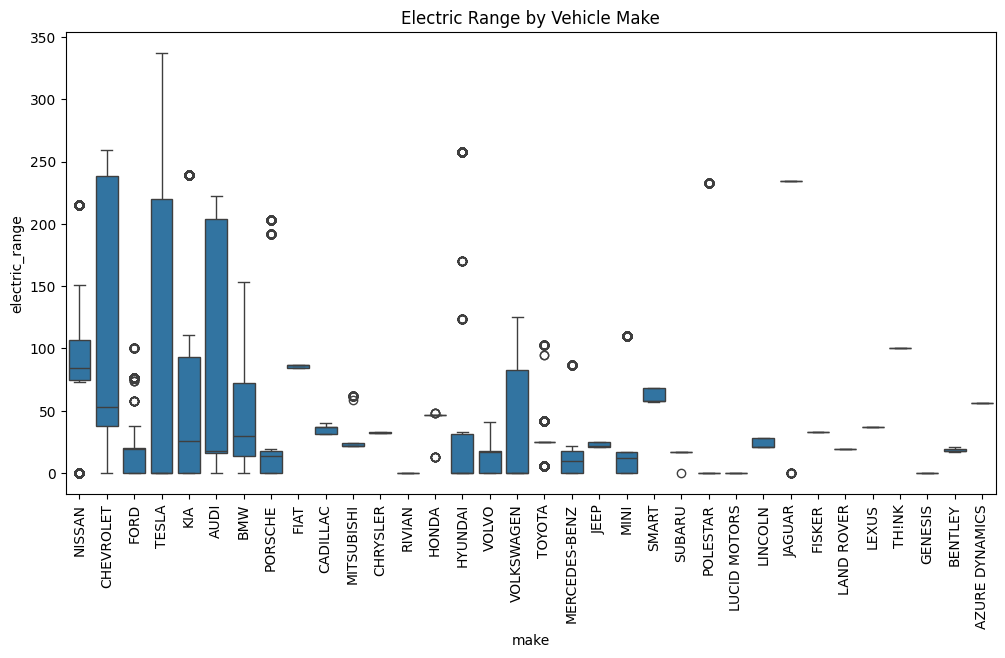

In [13]:
# Bivariate Analysis: Electric Range by Vehicle Make
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='make', y='electric_range')
plt.title('Electric Range by Vehicle Make')
plt.xticks(rotation=90)
plt.show()

In [14]:
# Count the number of vehicles by 'model_year'
model_year_counts = df['model_year'].value_counts().reset_index()
model_year_counts.columns = ['model_year', 'number_of_vehicles']

# Create a bar chart for the number of vehicles by model_year
fig = px.bar(model_year_counts, 
             x='model_year', 
             y='number_of_vehicles',
             title='Number of Vehicles by Model Year',
             labels={'model_year': 'Model Year', 'number_of_vehicles': 'Number of Vehicles'})

fig.show()

In [15]:
ev_count_by_pincode = df.groupby(['postal_code', 'model_year', 'state']).size().reset_index(name='Number_of_EV_Vehicles')

In [16]:
print(ev_count_by_pincode)

      postal_code  model_year state  Number_of_EV_Vehicles
0            1730        2018    MA                      1
1            1731        2022    MA                      1
2            1824        2022    MA                      1
3            2842        2014    RI                      1
4            3804        2020    NH                      1
...           ...         ...   ...                    ...
5032        99403        2020    WA                      4
5033        99403        2021    WA                      6
5034        99403        2022    WA                      5
5035        99403        2023    WA                      1
5036        99701        2016    AK                      1

[5037 rows x 4 columns]


In [17]:
state_data = ev_count_by_pincode['state'].value_counts().reset_index()

In [18]:
print(state_data)

   state  count
0     WA   4760
1     CA     73
2     VA     34
3     MD     24
4     TX     13
5     CO      9
6     NV      8
7     GA      7
8     NC      7
9     FL      6
10    IL      6
11    DC      6
12    CT      6
13    AZ      6
14    OR      5
15    NE      5
16    SC      5
17    UT      4
18    AR      4
19    HI      4
20    NY      4
21    TN      3
22    MO      3
23    LA      3
24    KS      3
25    MA      3
26    PA      3
27    NJ      3
28    NH      2
29    ID      2
30    WY      2
31    RI      1
32    ME      1
33    DE      1
34    MS      1
35    KY      1
36    OH      1
37    WI      1
38    MN      1
39    SD      1
40    ND      1
41    AL      1
42    OK      1
43    NM      1
44    AK      1


In [19]:
geojson_url = "output.json"

In [54]:
# Assuming the dataset is in a CSV file named 'dataset.csv'
df = pd.read_csv('dataset.csv')

# Check the column names to ensure 'Vehicle Location' exists
print(df.columns)

# If 'Vehicle Location' exists, proceed with extracting latitude and longitude
if 'Vehicle Location' in df.columns:
    # Extract latitude and longitude from the Vehicle Location column
    df[['longitude', 'latitude']] = df['Vehicle Location'].str.extract(r'POINT \(([-\d.]+) ([-\d.]+)\)')

    # Convert latitude and longitude to numeric
    df['latitude'] = pd.to_numeric(df['latitude'])
    df['longitude'] = pd.to_numeric(df['longitude'])

    # Check for unique states in the dataset
    print("Unique states in the dataset:", df['State'].unique())

    # Aggregate the data by city and state to get the total number of EVs
    city_data = df.groupby(['City', 'State', 'latitude', 'longitude']).size().reset_index(name='Number_of_EV_Vehicles')

    # Check the aggregated data
    print(city_data.head())

    # Create Scatter Mapbox map with a specified color scale
    fig = px.scatter_mapbox(
        city_data,
        lat='latitude',
        lon='longitude',
        color='Number_of_EV_Vehicles',
        size='Number_of_EV_Vehicles',
        hover_name='City',
        hover_data={'State': True, 'Number_of_EV_Vehicles': True},
        color_continuous_scale='Viridis',  # You can change this to any other color scale
        size_max=15,
        zoom=3,
        title='Total Number of EV Vehicles by City'
    )

    # Adjust marker size to make smaller counts more visible
    fig.update_traces(marker=dict(sizemin=5, sizemode='area'))

    # Update layout for better visualization
    fig.update_layout(mapbox_style="carto-positron", mapbox_zoom=3, mapbox_center={"lat": 37.0902, "lon": -95.7129})
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

    fig.show()
else:
    print("The column 'Vehicle Location' does not exist in the DataFrame.")

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')
Unique states in the dataset: ['FL' 'NV' 'WA' 'IL' 'NY' 'VA' 'OK' 'KS' 'CA' 'NE' 'MD' 'CO' 'DC' 'TN'
 'SC' 'CT' 'OR' 'TX' 'SD' 'HI' 'GA' 'MS' 'AR' 'NC' 'MO' 'UT' 'PA' 'DE'
 'OH' 'WY' 'AL' 'ID' 'AZ' 'AK' 'LA' 'NM' 'WI' 'KY' 'NJ' 'MN' 'MA' 'ME'
 'RI' 'NH' 'ND']
             City State  latitude  longitude  Number_of_EV_Vehicles
0        Aberdeen    WA  46.97606 -123.81619                     99
1            Acme    WA  48.71768 -122.20348                      6
2     Adairsville    GA  34.37047  -84.92804                      1
3            Addy    WA  48.35609 -117.83790                      3
4  Airway Heights    WA  47.64430 -117.5931

In [18]:
from PIL import Image
import os

In [27]:
# Step 1: Reshape the data to get the cumulative sum for each maker by year
df_cumulative = df.groupby(['model_year', 'make'])['Number_of_Vehicles'].sum().unstack(fill_value=0)
df_cumulative = df_cumulative.cumsum(axis=0)

# Step 2: Create frames for the animation
frames_folder = 'frames'
os.makedirs(frames_folder, exist_ok=True)

# Define a color map for the makes
color_map = plt.get_cmap("viridis", len(df['make'].unique()))

# Generate frames for each year
for year in df_cumulative.index:
    plt.figure(figsize=(10, 6))
    
    # Get the cumulative counts up to the current year
    current_data = df_cumulative.loc[:year].iloc[-1]
    
    # Sort the current data in descending order and select the top N
    top_n = current_data.sort_values(ascending=False).head(10)  
    
    # Plotting
    bars = top_n.plot(kind='barh', color=color_map(np.linspace(0, 1, len(top_n))), edgecolor='black')
    plt.title(f'Year: {year} - Top EV Makers')
    plt.xlabel('Cumulative Number of EV Vehicles')
    plt.xlim(0, top_n.max() + 50)
    plt.ylabel('Make')
    plt.gca().invert_yaxis()  
    plt.tight_layout()
    
    # Save the frame
    plt.savefig(f'{frames_folder}/frame_{year}.png')
    plt.close()

# Create additional frames for smoother transitions
extra_frames_folder = 'extra_frames'
os.makedirs(extra_frames_folder, exist_ok=True)

# Create additional frames between each year for smoother transitions
for i in range(len(df_cumulative.index) - 1):
    year1 = df_cumulative.index[i]
    year2 = df_cumulative.index[i + 1]
    
    for t in np.linspace(0, 1, num=10):  
        plt.figure(figsize=(10, 6))
        
        # Calculate the intermediate cumulative counts
        current_data = (df_cumulative.loc[year1] * (1 - t) + df_cumulative.loc[year2] * t)
        
        # Sort and select the top N
        top_n = current_data.sort_values(ascending=False).head(10)  
        
        # Plotting
        bars = top_n.plot(kind='barh', color=color_map(np.linspace(0, 1, len(top_n))), edgecolor='black')
        plt.title(f'Year: {int(year1 + t * (year2 - year1))} - Top EV Makers')
        plt.xlabel('Cumulative Number of EV Vehicles')
        plt.xlim(0, top_n.max() + 50)
        plt.ylabel('Make')
        plt.gca().invert_yaxis()  
        plt.tight_layout()
        
        # Save the intermediate frame
        plt.savefig(f'{extra_frames_folder}/frame_{int(year1 + t * (year2 - year1))}.png')
        plt.close()

# Combine both frames for GIF creation
all_frames = sorted(os.listdir(frames_folder)) + sorted(os.listdir(extra_frames_folder))

# Step 4: Create a GIF from the saved frames
images = []
for frame in all_frames:
    frame_path = f"{frames_folder}/{frame}" if 'frame_' in frame else f"{extra_frames_folder}/{frame}"
    print(f"Attempting to open: {frame_path}")  # Debugging line
    try:
        img = Image.open(frame_path)  # Use the correct Image class
        images.append(img)
    except Exception as e:
        print(f"Error opening {frame_path}: {e}")

# Save as GIF
if images:
    gif_path = 'final.gif'
    images[0].save(gif_path, save_all=True, append_images=images[1:], optimize=False, duration=250, loop=0)
    print(f'Animated GIF saved as {gif_path}')
else:
    print("No images were loaded; GIF creation failed.")

Attempting to open: frames/frame_1997.png
Attempting to open: frames/frame_1998.png
Attempting to open: frames/frame_1999.png
Attempting to open: frames/frame_2000.png
Attempting to open: frames/frame_2002.png
Attempting to open: frames/frame_2008.png
Attempting to open: frames/frame_2010.png
Attempting to open: frames/frame_2011.png
Attempting to open: frames/frame_2012.png
Attempting to open: frames/frame_2013.png
Attempting to open: frames/frame_2014.png
Attempting to open: frames/frame_2015.png
Attempting to open: frames/frame_2016.png
Attempting to open: frames/frame_2017.png
Attempting to open: frames/frame_2018.png
Attempting to open: frames/frame_2019.png
Attempting to open: frames/frame_2020.png
Attempting to open: frames/frame_2021.png
Attempting to open: frames/frame_2022.png
Attempting to open: frames/frame_2023.png
Attempting to open: frames/frame_1997.png
Attempting to open: frames/frame_1998.png
Attempting to open: frames/frame_1999.png
Attempting to open: frames/frame_2

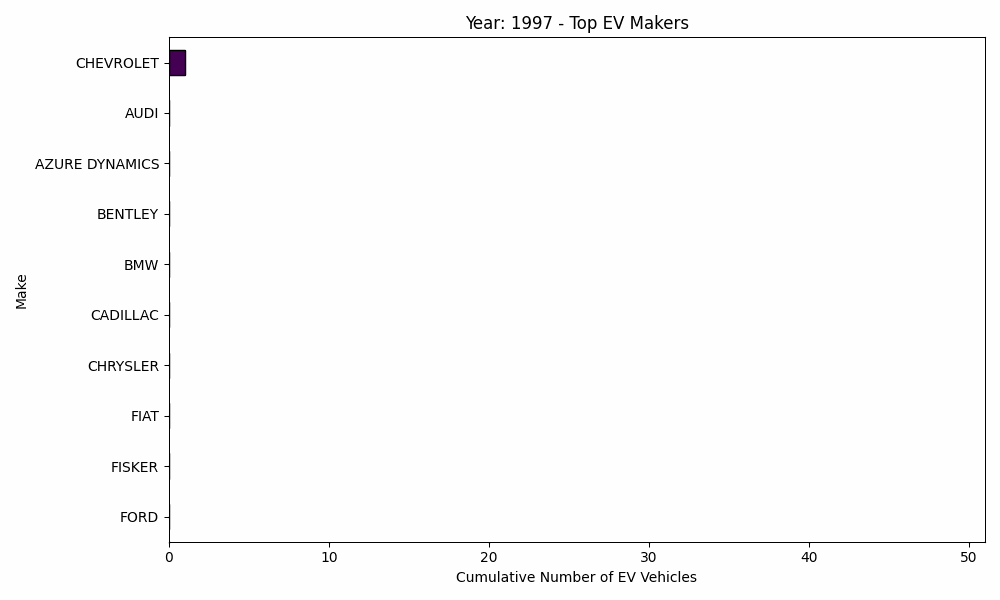

In [28]:
from IPython.display import Image, display

# Display the GIF in Jupyter Notebook
display(Image(filename='final.gif'))